In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("train.csv",usecols=['Age','Survived','Fare','SibSp'])
df.head(4)

,Survived,Age,SibSp,Fare
0,0,22.0,1,7.2500
1,1,38.0,1,71.2833
2,1,26.0,0,7.9250
3,1,35.0,1,53.1000


In [3]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [4]:
x_train.head(4)

,Age,SibSp,Fare
811,39.0,0,24.1500
29,NaN,0,7.8958
49,18.0,1,17.8000
105,28.0,0,7.8958


In [5]:
y_train.head(4)

811    0
29     0
49     0
105    0
Name: Survived, dtype: int64

In [6]:
df.isna().sum()

Survived      0
Age         177
SibSp         0
Fare          0
dtype: int64

In [7]:
df.isna().mean()

Survived    0.000000
Age         0.198653
SibSp       0.000000
Fare        0.000000
dtype: float64

In [8]:
x_train['age_99']=x_train['Age'].fillna(99)
x_train['age_-1']=x_train['Age'].fillna(-1)

In [9]:
print('Age -- ',x_train['Age'].var())
print('age_99 --',x_train['age_99'].var())
print('age_-1 --',x_train['age_-1'].var())

Age --  215.50646659928697
age_99 -- 941.4026531216915
age_-1 -- 326.99047846659244


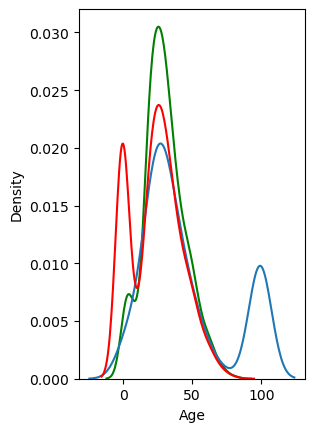

In [10]:
plt.subplot(122)
sns.kdeplot(x_train['Age'],color='green')
plt.subplot(122)
sns.kdeplot(x_train['age_99'])
plt.subplot(122)
sns.kdeplot(x_train['age_-1'],color='red')
plt.show()

In [11]:
x_train.cov()

,Age,SibSp,Fare,age_99,age_-1
Age,215.506467,-4.131563,50.550916,215.506467,215.506467
SibSp,-4.131563,1.254127,9.138365,-2.618602,-3.598390
Fare,50.550916,9.138365,2222.654295,-75.137716,92.148387
age_99,215.506467,-2.618602,-75.137716,941.402653,-173.654380
age_-1,215.506467,-3.598390,92.148387,-173.654380,326.990478


In [12]:
x_train.corr()

,Age,SibSp,Fare,age_99,age_-1
Age,1.000000,-0.302759,0.069309,1.000000,1.000000
SibSp,-0.302759,1.000000,0.173086,-0.076210,-0.177693
Fare,0.069309,0.173086,1.000000,-0.051944,0.108090
age_99,1.000000,-0.076210,-0.051944,1.000000,-0.312990
age_-1,1.000000,-0.177693,0.108090,-0.312990,1.000000


<AxesSubplot:>

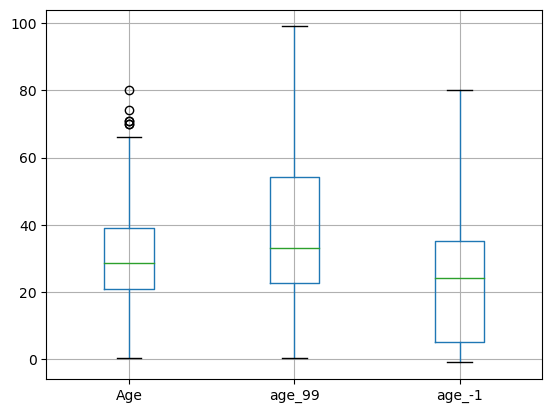

In [13]:
x_train[['Age','age_99','age_-1']].boxplot()

In [39]:
imputer_age_99=SimpleImputer(strategy='constant',fill_value=99)
imputer_age_1=SimpleImputer(strategy='constant',fill_value=-1)

In [40]:
ct=ColumnTransformer([
    ('imputer_age_99',imputer_age,['age_99']),
('imputer_age_1',imputer_age,['age_-1'])])

In [41]:
ct.fit(x_train)

ColumnTransformer(transformers=[('imputer_age_99',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['age_99']),
                                ('imputer_age_1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['age_-1'])])

In [42]:
ct.named_transformers_['imputer_age_99'].statistics_

array([99.])

In [43]:
ct.named_transformers_['imputer_age_1'].statistics_

array([99.])

In [45]:
x_train.isna().mean()

Age       0.202247
SibSp     0.000000
Fare      0.000000
age_99    0.000000
age_-1    0.000000
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

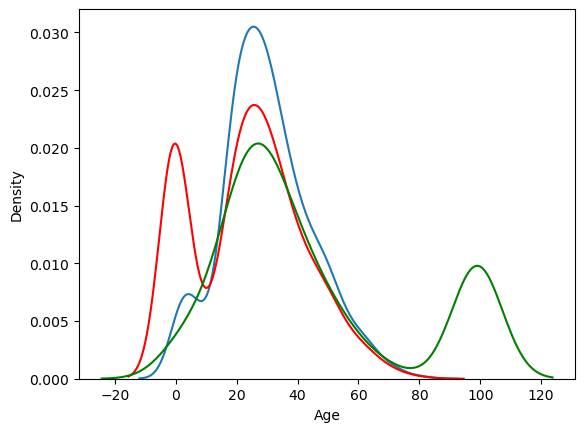

In [48]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['age_-1'],color='red')
sns.kdeplot(x_train['age_99'],color='green')